# Protein-Protein Interactions in NetworkX

## Reading in the data

The code for this section is modified from the template provided on Edstem (https://edstem.org/au/courses/9294/workspaces/pom60rmZj83qux9UNbo65jd1BjjfWEj4)


In [1]:

# one needs to import those packages which are needed; best to be done at the beginning of the program.

import networkx as nx

import numpy as np
import scipy as sp

# some basic settings for plotting figures
import matplotlib.pyplot as plt
%matplotlib inline 
font = {'family' : 'DejaVu Sans',
        'size'   : 18}

plt.rc('font', **font)

In [2]:
G = nx.read_weighted_edgelist("./4932.protein.links.v11.5.txt",comments="#",nodetype=str)

### Conversion to unweighted network

We convert the graph to a unweighted network, by removing all edges with confidence < 700.


In [3]:
# delete those edges with a combined score of < threshold_score (small confidence)
threshold_score = 700
boundary_count = 0

for edge in G.edges: 
    weight = list(G.get_edge_data(edge[0],edge[1]).values())
    if (weight[0] == threshold_score):
        boundary_count += 1
    if (weight[0] < threshold_score):
        G.remove_edge(edge[0],edge[1])

print(boundary_count)

377


## Problem 1

How many nodes are there with degree $k=1$?

In [4]:
end_nodes = 0
for node, degree in G.degree():
    if degree == 1:
        end_nodes += 1
print(end_nodes)

165


## Problem 2

What is the mean degree?

In [5]:
total_degree = 0
for node, degree in G.degree():
    total_degree += degree

avg_degree = total_degree / G.number_of_nodes()
print(avg_degree)

37.65592743196747


## Problem 3

Which proteins have the largest degrees?

In [6]:
nodes = list(G.nodes())
degree = G.degree()
nodes.sort(key = lambda v: degree[v], reverse=True)

def remove_prefix(node):
    return node[5:]

for i in range(5):
    print(remove_prefix(nodes[i]), f"degree={degree[nodes[i]]}")


YJR123W degree=385
YKL009W degree=385
YNL178W degree=380
YDR064W degree=365
YDR101C degree=354


## Problem 4

Plot the (sorted) degrees as a function of their indices (first index belongs to the smallest degree
and the last index to the largest degree)

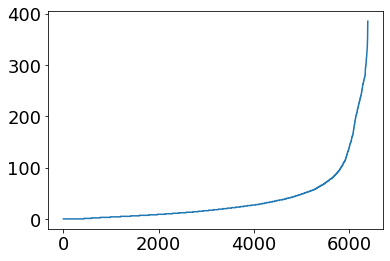

In [7]:
degree = sorted(dict(G.degree()).values())


fig, ax = plt.subplots()
ax.plot(range(len(degree)), degree)

## Problem 5

Plot the distribution of the degrees as a histogram using the command `matplotlib.pyplot.hist`. (read the documentation to check how to normalize the histogram).

(array([1.88732131e-02, 3.83882617e-03, 1.34866697e-03, 5.07781240e-04,
        3.29042243e-04, 3.77789242e-04, 3.61540243e-04, 1.94987996e-04,
        1.09680748e-04, 3.24979993e-05]),
 array([  0. ,  38.5,  77. , 115.5, 154. , 192.5, 231. , 269.5, 308. ,
        346.5, 385. ]),
 <BarContainer object of 10 artists>)

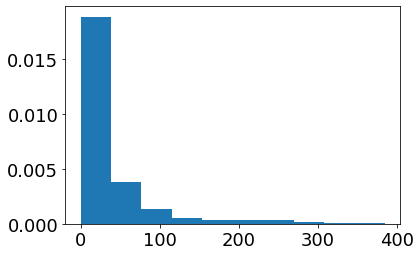

In [8]:
degree = sorted(dict(G.degree()).values())


plt.hist(degree, density=True)